<a href="https://colab.research.google.com/github/devingoldstein/QM2/blob/main/spanishdemandfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

save_directory = "/content/finaldata"

# Create the directory if it doesn't exist
!mkdir -p $save_directory

# Iterate through the uploaded files
for filename, content in uploaded.items():
    # Specify the full file path
    file_path = f"{save_directory}/{filename}"

    # Write the file content to the specified path
    with open(file_path, "wb") as f:
        f.write(content)

    print(f"File '{filename}' saved to '{file_path}'")

Saving SpanishDemand.csv to SpanishDemand.csv
File 'SpanishDemand.csv' saved to '/content/finaldata/SpanishDemand.csv'


In [2]:
import pandas

import matplotlib
%matplotlib inline

data = pandas.read_csv('/content/finaldata/SpanishDemand.csv')
data.head()

,Country,Managers,Professionals,Technicians,Clerical,Service,Agriculture,Craft,Plant,Elementary,National Average
0,Austria,4.885,0.031,0.003,1.223,0.009,0.000,0.013,1.130,0.005,1.499
1,Belgium,1.943,0.012,0.016,0.930,1.155,0.000,0.011,0.812,0.015,1.047
2,Bulgaria,5.472,0.044,0.020,4.006,0.729,0.016,0.104,0.095,0.037,2.460
3,Croatia,0.000,0.056,0.065,15.983,47.419,0.264,15.617,15.068,5.088,15.012
4,Cyprus,0.000,0.001,0.000,0.000,0.000,0.000,0.290,0.323,0.371,0.064


In [3]:
#cleaning the data

import pandas as pd
import numpy as np

df = pd.read_csv('/content/finaldata/SpanishDemand.csv')

clean = df.replace(',', '', regex=True)
clean.iloc[:, 1:] = clean.iloc[:, 1:].replace('-', np.nan, regex=True).astype(float)

clean.head()

,Country,Managers,Professionals,Technicians,Clerical,Service,Agriculture,Craft,Plant,Elementary,National Average
0,Austria,4.885,0.031,0.003,1.223,0.009,0.000,0.013,1.130,0.005,1.499
1,Belgium,1.943,0.012,0.016,0.930,1.155,0.000,0.011,0.812,0.015,1.047
2,Bulgaria,5.472,0.044,0.020,4.006,0.729,0.016,0.104,0.095,0.037,2.460
3,Croatia,0.000,0.056,0.065,15.983,47.419,0.264,15.617,15.068,5.088,15.012
4,Cyprus,0.000,0.001,0.000,0.000,0.000,0.000,0.290,0.323,0.371,0.064


In [ ]:
!pip install geopandas matplotlib plotly
import geopandas as gpd
import plotly.express as px

# Load GeoJSON data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[world['continent'] == 'Europe']

# Merge with your dataset
merged_data = europe.merge(clean, left_on='name', right_on='Country')

# Create an interactive choropleth map
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Managers',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='pinkyl',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Managerial Roles Demanding Spanish Speakers', coloraxis_colorbar=dict(title='Managers'))

# Show the interactive map
fig.show()

<ipython-input-4-1900da08a0b3>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Professionals',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='pubugn',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Professional Roles Demanding Spanish Speakers', coloraxis_colorbar=dict(title='Professionals}'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Technicians ',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='icefire',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Technician Roles Demanding Spanish Speakers', coloraxis_colorbar=dict(title='Technicians'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Clerical',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='delta',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Clerical Roles Demanding Spanish Speakers', coloraxis_colorbar=dict(title='Clerical'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Service',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='matter',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Service Roles Demanding Spanish Speakers', coloraxis_colorbar=dict(title='Service'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Agriculture ',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='gnbu',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Agriculture Roles Demanding Spanish Speakers', coloraxis_colorbar=dict(title='Agriculture'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Craft',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='spectral',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Craft Roles Demanding Spanish Speakers', coloraxis_colorbar=dict(title='Craft'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='Plant',  # Replace with  desired column
                    hover_name='name',
                    color_continuous_scale='jet',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Percentage of Plant Roles Demanding Spanish Speakers', coloraxis_colorbar=dict(title='Plant'))

# Show the interactive map
fig.show()

In [ ]:
fig = px.choropleth(merged_data,
                    locations='iso_a3',
                    color='National Average ',  # Replace with  desired column
                    hover_name='name',
                    hover_data={'National Average ':True,'Managers':True,'Professionals':True,'Technicians ':True,'Clerical':True,'Service':True,'Agriculture ':True,'Craft':True,'Plant':True,'Elementary':True},
                    color_continuous_scale='sunsetdark',
                    projection='natural earth')

# Customize the map layout
fig.update_geos(lataxis_range=[30, 80], lonaxis_range=[-20, 45])
fig.update_layout(title='Average Percentage of Jobs Demanding Spanish Speakers', coloraxis_colorbar=dict(title='National Average'))

# Show the interactive map
fig.show()
fig.write_json('interactive_spanishdemand.json')

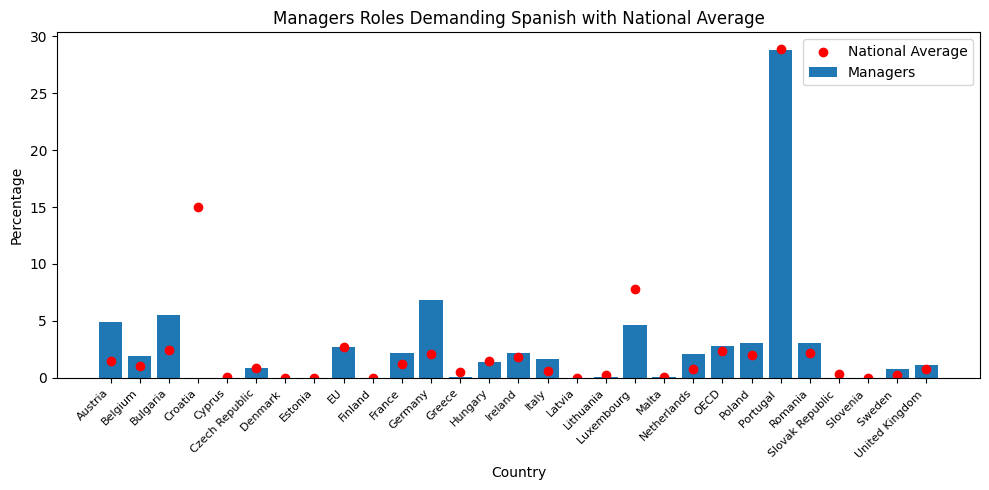

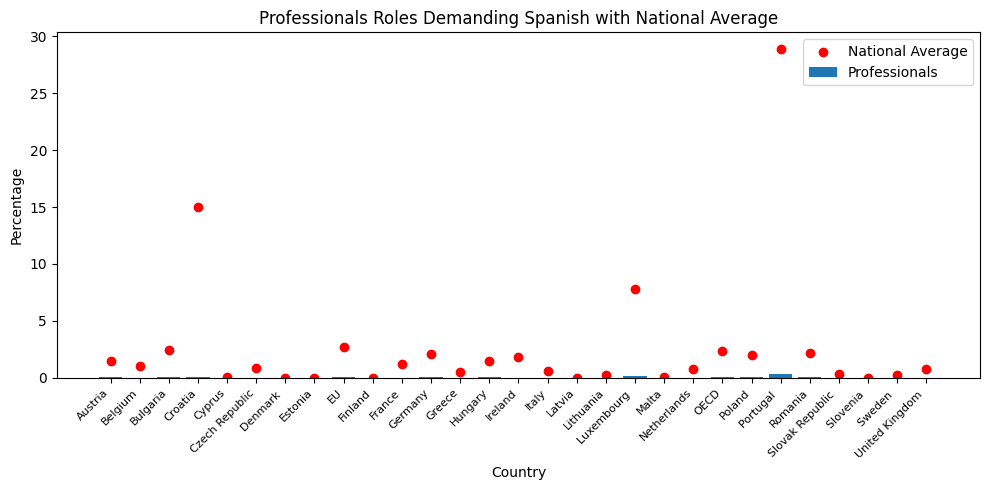

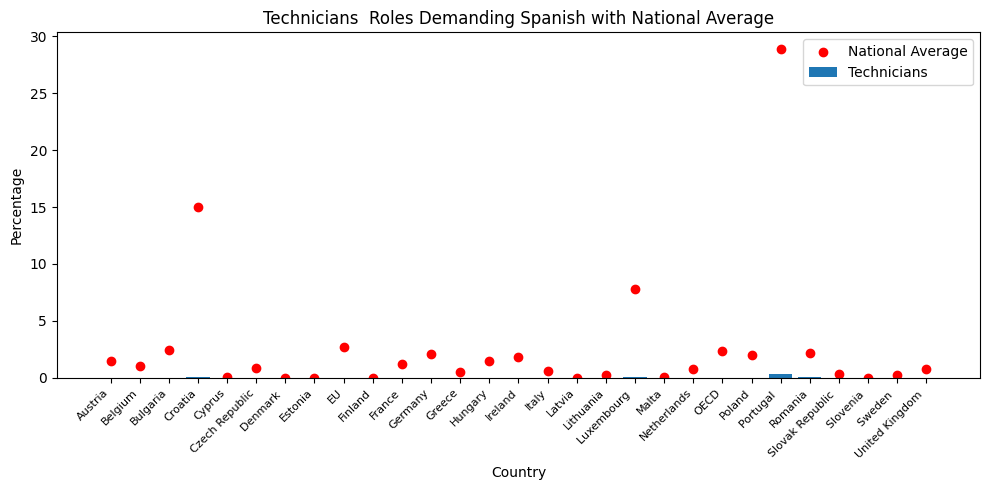

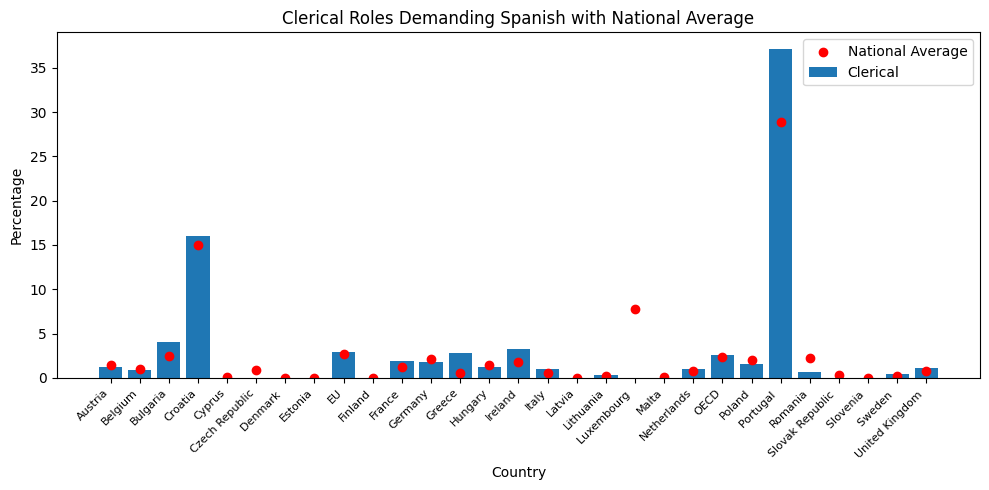

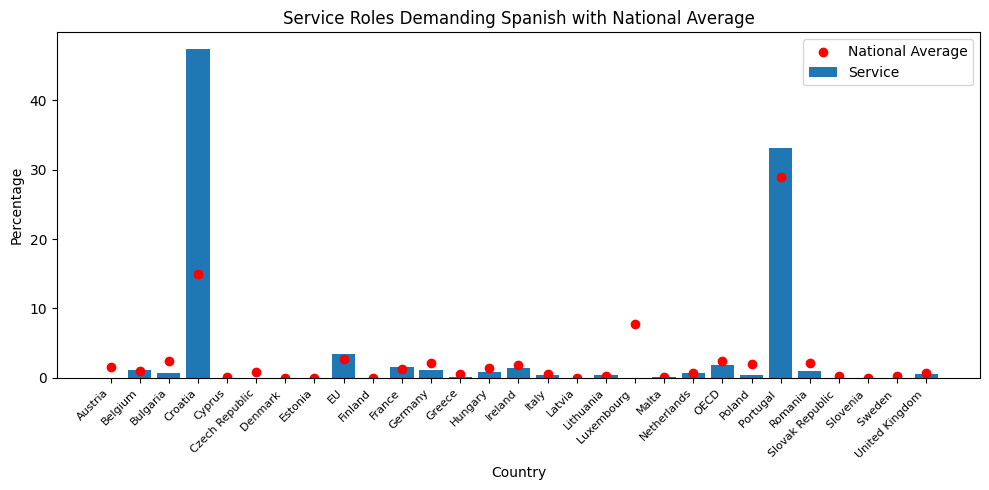

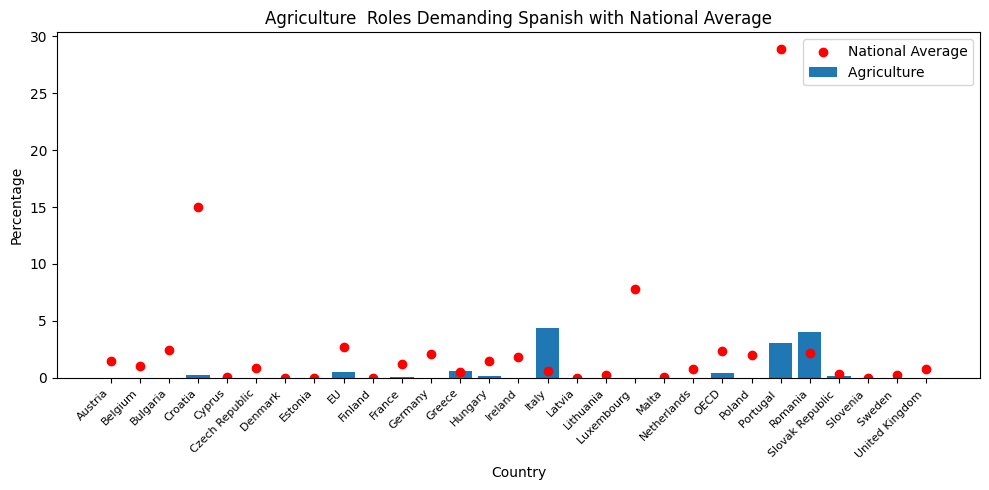

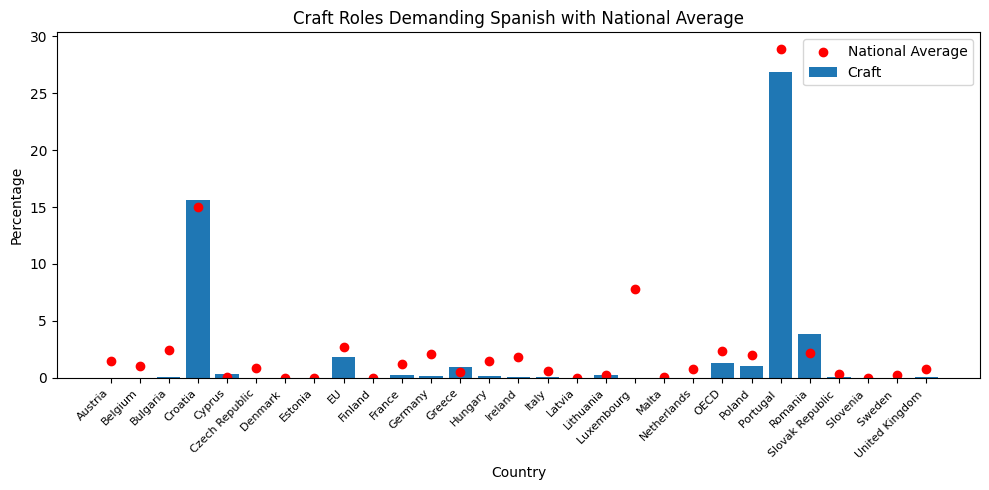

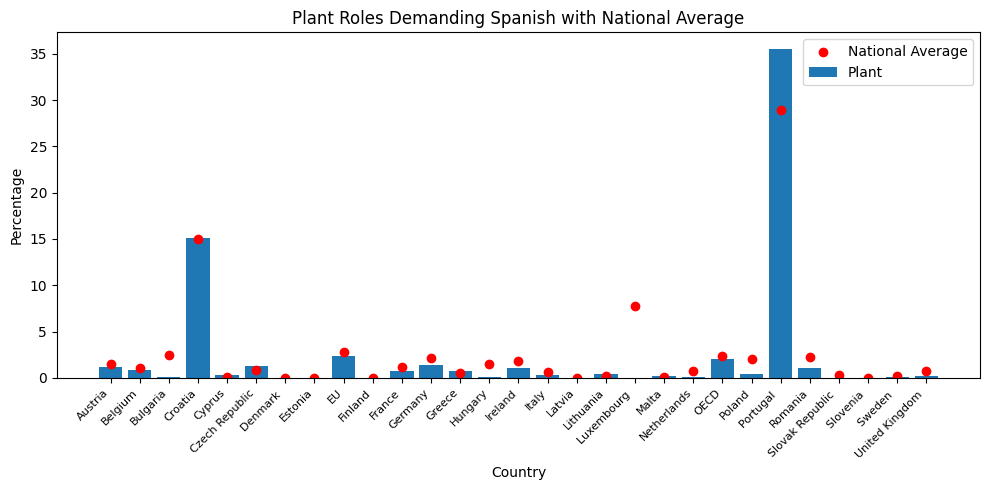

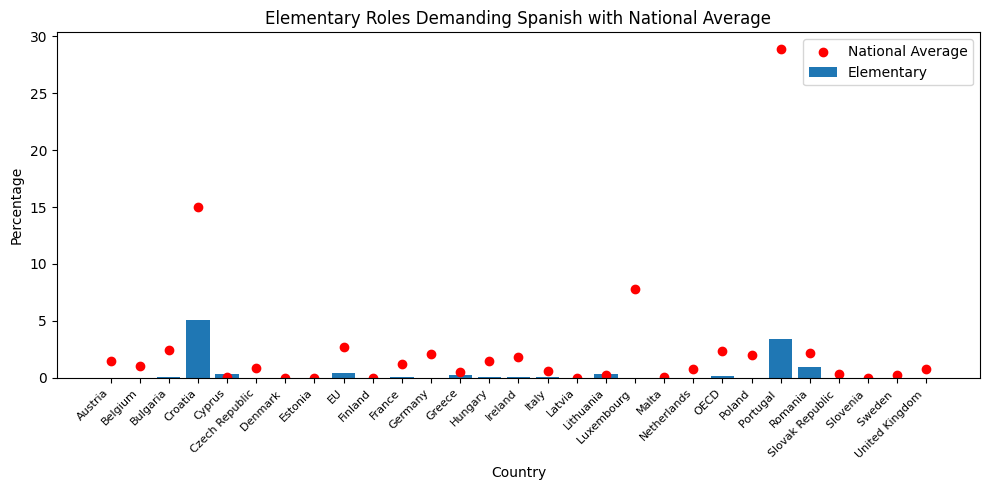

In [6]:
import matplotlib.pyplot as plt
data = clean
dfspanish = pd.DataFrame(data)

dfspanish['National Average '] = pd.to_numeric(dfspanish['National Average '], errors='coerce')

# Plotting
occupation_titles = dfspanish.columns[1:-1]
countries = dfspanish['Country']

for occupation in occupation_titles:
    plt.figure(figsize=(10, 5))
    plt.bar(countries, dfspanish[occupation], label=occupation)
    plt.scatter(countries, dfspanish['National Average '], color='red', marker='o', label='National Average')
    plt.title(f'{occupation} Roles Demanding Spanish with National Average')
    plt.xlabel('Country')
    plt.ylabel('Percentage')

    plt.xticks(rotation=45, ha='right', fontsize=8)

    plt.legend()
    plt.tight_layout()
    plt.show()